In [54]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [22]:
conn = sqlite3.connect("../data_collection/campus_data.db")

In [ ]:
df_historical = pd.read_sql_query("Select * FROM historical_air_quality_data", conn)
conn.close()

In [31]:
df_historical['date'] = pd.to_datetime(df_historical['date'])

C:\Users\Sanjana\AppData\Local\Temp\ipykernel_90972\383656060.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_historical['date'] = pd.to_datetime(df_historical['date'])


In [32]:
last_week = df_historical[df_historical['date'] >= (df_historical['date'].max() - pd.Timedelta(days = 7))]

In [35]:
pollutants = ['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone']

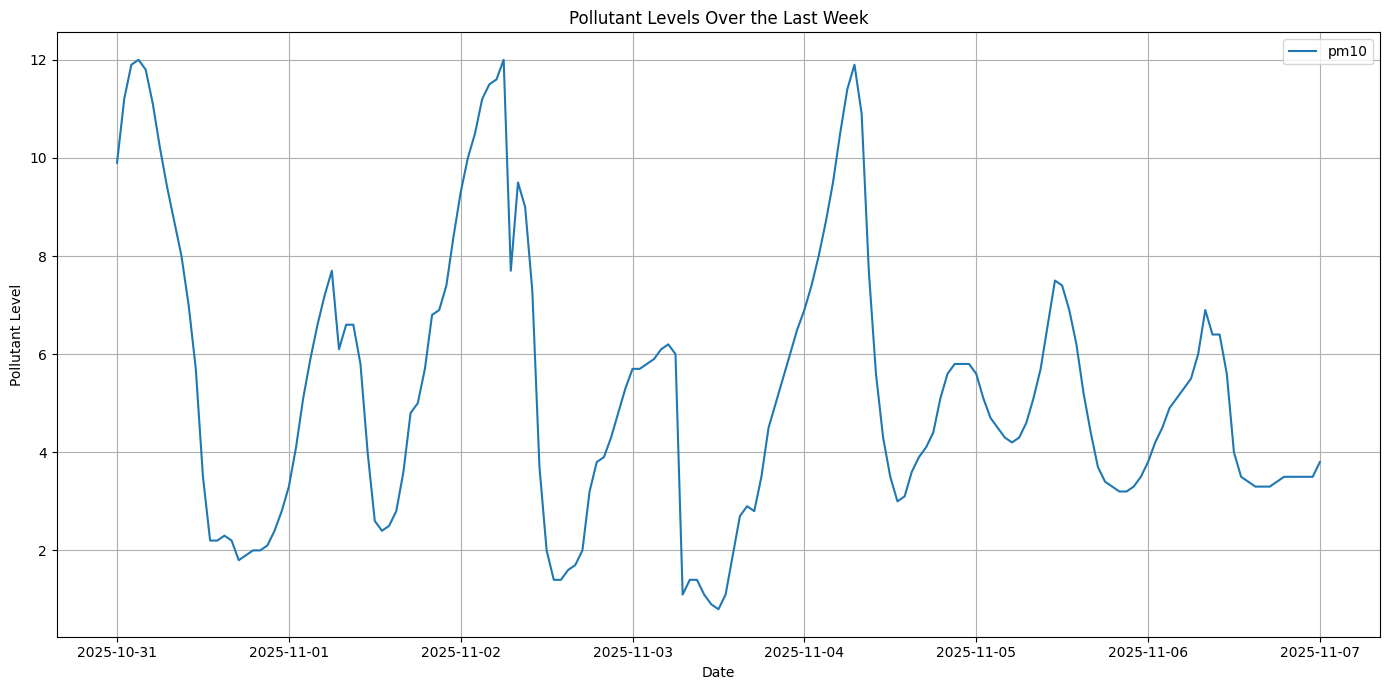

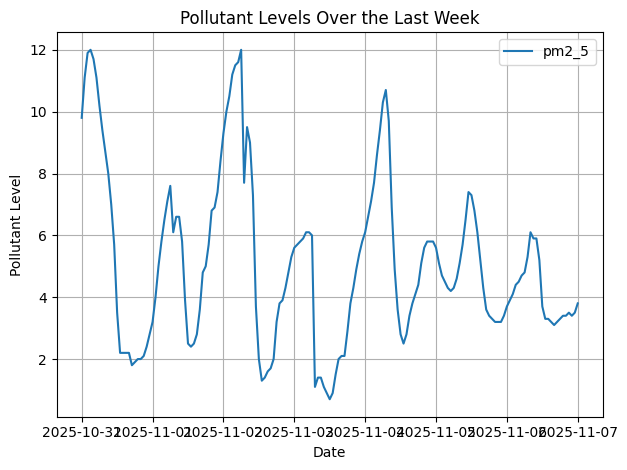

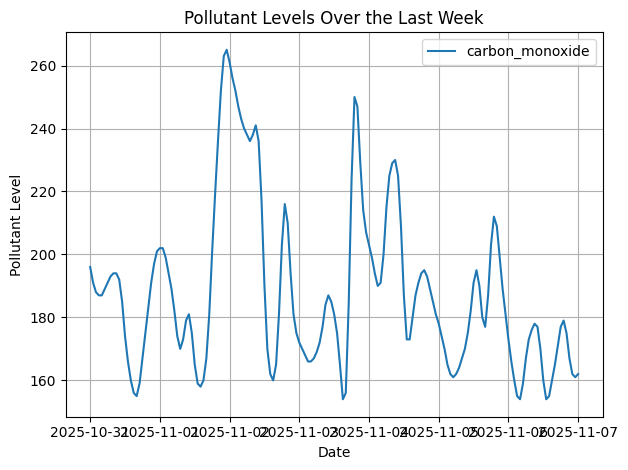

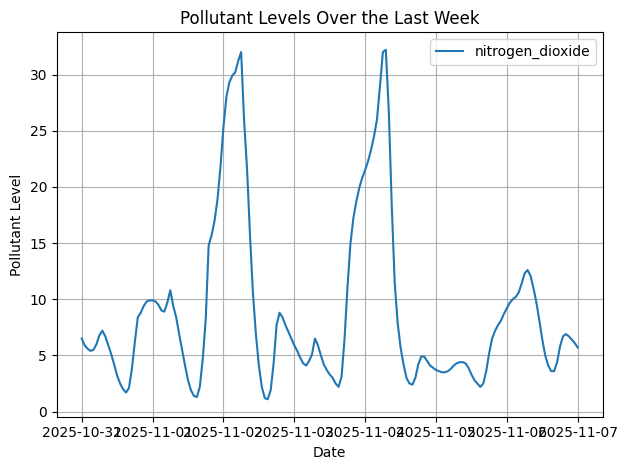

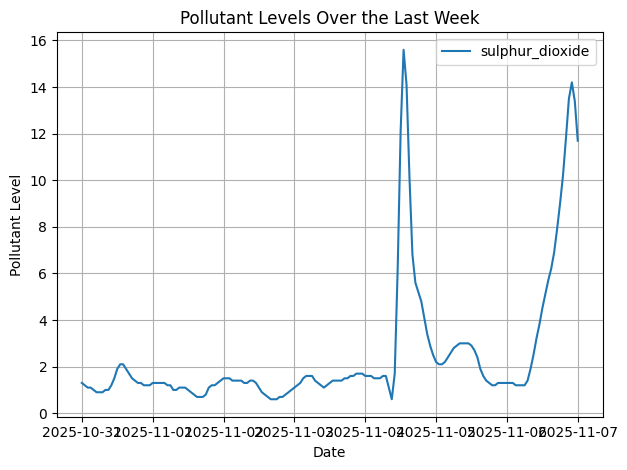

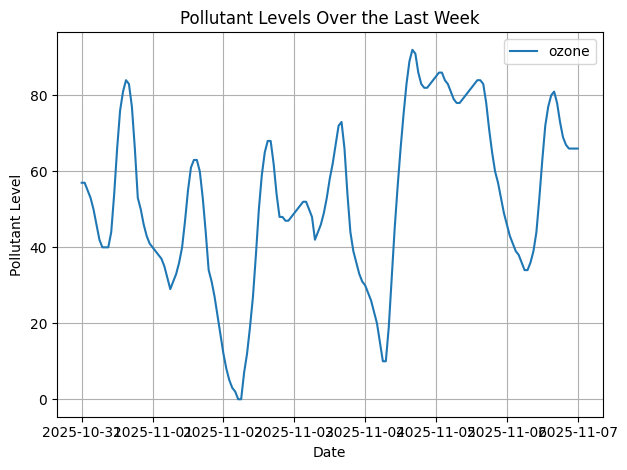

In [36]:
plt.figure(figsize = (14,7))
for pollutant in pollutants:
    plt.plot(last_week['date'], last_week[pollutant], label = pollutant)

    plt.xlabel('Date')
    plt.ylabel('Pollutant Level')
    plt.title('Pollutant Levels Over the Last Week')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [55]:
latest = df_historical.iloc[-1]

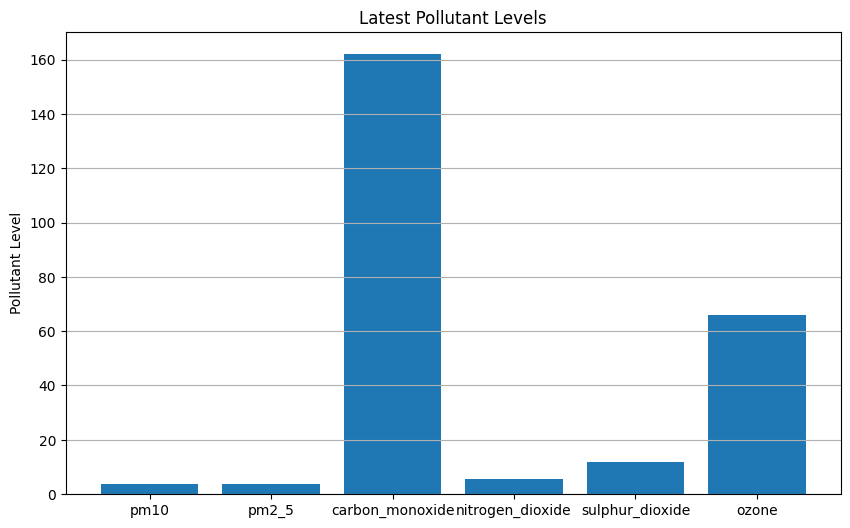

In [56]:
plt.figure(figsize = (10,6))
plt.bar(pollutants, latest[pollutants])
plt.ylabel("Pollutant Level")
plt.title("Latest Pollutant Levels")
plt.grid(axis = 'y')
plt.show()

In [57]:
fig = go.Figure()

In [58]:
for pollutant in pollutants:
    fig.add_trace(go.Scatter(
        x = df_historical['date'],
        y = df_historical[pollutant],
        mode = 'lines',
        name = pollutant,
        visible = True

    ))

In [59]:
buttons = []
for i, pollutant in enumerate(pollutants):
    visible = [False] * len(pollutants)
    visible[i] = True
    buttons.append(dict(
        label = pollutant,
        method = 'update',
        args = [{'visible' : visible},
               {'title' : f'{pollutant} Levels Over Time'}]
    ))

In [60]:
buttons.append(dict(
    label = "All",
    method = "update",
    args = [{"visible": [True]* len(pollutants)},
            {"title": "All Pollutant Levels Over Time"}]
))

In [ ]:
fig.update_layout(
    title = "Interactive Pollutant Levels Over Time",
    xaxis_title = "Date",
    yaxis_title = "Pollutant Level",
    updatemenus = [dict(type = "dropdown", direction = "down", buttons = buttons)]
)
fig.show()